<a href="https://colab.research.google.com/github/AjinJayan/AJ/blob/master/Copy_of_CNNMNIST_Digit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%tensorflow_version 2.x
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.layers import Input,Conv2D,Dense,Flatten,Dropout,MaxPool2D
from tensorflow.keras.models import Model
import time as t

In [0]:
mnist=tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test)=mnist.load_data()
x_train,x_test=x_train/255.0,x_test/255.0
print("x_train.shape",x_train.shape)

x_train.shape (60000, 28, 28)


In [0]:
x_train=np.expand_dims(x_train,-1)
x_test = np.expand_dims(x_test,-1)
print(x_train.shape)

(60000, 28, 28, 1)


In [0]:
K=len(set(y_train))
print("Number of classes:",K)

Number of classes: 10


In [0]:
i=Input(shape=x_train[0].shape)
x=Conv2D(32,(3,3),strides=2,activation='relu')(i)
x=Conv2D(64,(3,3),strides=2,activation='relu')(x)
x=MaxPool2D(pool_size=(2,2),strides=2,padding='valid')(x)
x=Dropout(0.25)(x)
x=Flatten()(x)
x=Dense(128,activation='relu')(x)
x=Dropout(0.5)(x)
x=Dense(K,activation='softmax')(x)

model=Model(i,x)

In [0]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 13, 13, 32)        320       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 6, 6, 64)          18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 3, 3, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               7385

In [0]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
A1=t.time()
r=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=10)
A2=t.time()
print(A2-A1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 12s 205us/sample - loss: 0.3808 - accuracy: 0.8786 - val_loss: 0.0928 - val_accuracy: 0.9677
Epoch 2/10
60000/60000 [==============================] - 6s 98us/sample - loss: 0.1593 - accuracy: 0.9509 - val_loss: 0.0632 - val_accuracy: 0.9781
Epoch 3/10
60000/60000 [==============================] - 6s 97us/sample - loss: 0.1247 - accuracy: 0.9621 - val_loss: 0.0520 - val_accuracy: 0.9831
Epoch 4/10
60000/60000 [==============================] - 6s 96us/sample - loss: 0.1030 - accuracy: 0.9691 - val_loss: 0.0453 - val_accuracy: 0.9847
Epoch 5/10
60000/60000 [==============================] - 6s 94us/sample - loss: 0.0917 - accuracy: 0.9717 - val_loss: 0.0416 - val_accuracy: 0.9869
Epoch 6/10
60000/60000 [==============================] - 6s 99us/sample - loss: 0.0855 - accuracy: 0.9734 - val_loss: 0.0366 - val_accuracy: 0.9866
Epoch 7/10
60000/60000 [==============================

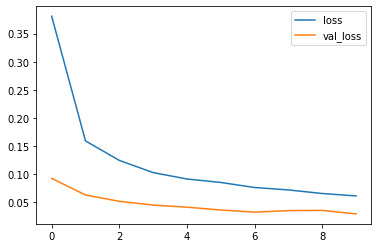

In [0]:
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()

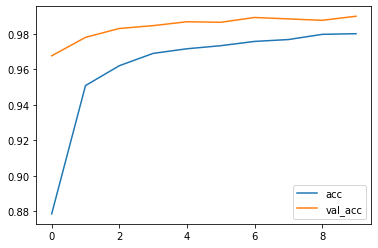

In [0]:
plt.plot(r.history['accuracy'],label='acc')
plt.plot(r.history['val_accuracy'],label='val_acc')
plt.legend()

In [0]:
A3=t.time()
print(model.evaluate(x_test,y_test))
A4=t.time()
print(A4-A3)

10000/10000 [==============================] - 1s 61us/sample - loss: 0.0296 - accuracy: 0.9900
[0.029626153062496087, 0.99]
0.6488223075866699


In [0]:
predictions=model.predict([x_test])
print(np.argmax(predictions[1000]))

9
